# Introduction to Jupyter, Python, Pandas and an end-to-end project in Machine Learning

Welcome to the Topics in Machine Learning course. In this course we will introduce the basic concepts of machine learning. In particular we will look at tools and techniques that describe how to model a dataset with the purpose of prediction. An integrated part of that is how we approach data with the computer. We are choosing to do that with the tool you see in front of you: the Jupyter Notebook.

Classical software engineering demands a large amount of design and testing. In data analysis, testing remains very important, but the design is often evolving. The design evolves through a process known as *exploratory data analysis*. You will learn some of the techniques of exploratory data analysis in this course.

In this Notebook, we will work on an End-to-End project in Machine Learning where we will design a linear regression model to predict bike rentals. Before we go into the project, we will first introduce you to Jupyter, Python and Pandas.

### Choice of Language

In this module, we will be using Python for our programming language. A prerequisite of attending this course is that you have learnt at least one programming language in the past. It is not our objective to teach you python. At Level 4 and Masters we expect our students to be able pick up a language as they go. If you have not experienced python before it may be worth your while spending some time understanding the language. There are resources available for you to do this [here](https://docs.python.org/3/tutorial/index.html) that are based on the standard console. An introduction to the Jupyter notebook (formerly known as the IPython notebook) is available [here](https://ipython.readthedocs.io/en/stable/).

### Question 1

Who invented python and why? What was the language designed to do? What is the origin of the name "python"? Is the language a compiled language? Is it an object orientated language?

*Provide your answer here*


## Choice of Environment

We are working in the Jupyter notebook. It provides an environment for interacting with data in a natural way which is reproducible. We will be learning how to make use of the notebook throughout the course. The notebook allows us to combine code with descriptions, interactive visualizations, plots etc. In fact it allows us to do many of the things we need for data science. Notebooks can also be easily shared through the internet for ease of communication of ideas. The box this text is written in is a *markdown* box. Below we have a *code* box.

In [1]:
print("This is the Jupyter notebook")
print("It provides a platform for:")
words = ['Open', 'Data', 'Science']
from random import shuffle
for i in range(3):
    shuffle(words)
    print(' '.join(words))


This is the Jupyter notebook
It provides a platform for:
Data Open Science
Open Science Data
Open Science Data


Have a play with the code in the above box. Think about the following questions: what is the difference between `CTRL-enter` and `SHIFT-enter` in running the code? What does the command `shuffle` do? Can you find out by typing `shuffle?` in a code box?
Once you've had a play with the code we can load in some data using the `pandas` library for data analysis.

## Movie Body Count Example

There is a crisis in the movie industry, deaths are occuring on a massive scale. In every feature film the body count is tolling up. But what is the cause of all these deaths? Let's try and investigate.

For our first example of data science, we take inspiration from work by [researchers at NJIT](https://www.theswarmlab.com/blog/rvspython/r/2014/02/02/r-vs-python-round-2-2/). The researchers were comparing the qualities of Python with R. They put together a data base of results from the "Internet Movie Database" and the [Movie Body Count](http://www.moviebodycounts.com/) website which will allow us to do some preliminary investigation.

We will make use of data that has already been 'scraped' from the [Movie Body Count](http://www.moviebodycounts.com/) website. Code and the data is available at [a github repository](https://github.com/sjmgarnier/R-vs-Python/tree/master/Deadliest%20movies%20scrape/code). Git is a version control system and github is a website that hosts code that can be accessed through git. By sharing the code publicly through github, the authors are licensing the code publicly and allowing you to access and edit it. As well as accessing the code via github you can also [download the zip file](https://github.com/sjmgarnier/R-vs-Python/archive/master.zip). But let's do that in python

In [2]:
import urllib.request
urllib.request.urlretrieve('https://github.com/sjmgarnier/R-vs-Python/archive/master.zip', './master.zip')

('./master.zip', <http.client.HTTPMessage at 0x7d1cba72e4e0>)

Once the data is downloaded we can unzip it into the same directory where we are running the lab class.

In [3]:
import zipfile
zip = zipfile.ZipFile('./master.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

In [4]:
import pandas as pd # import the pandas library into a namespace called pd
film_deaths = pd.read_csv('./R-vs-Python-master/Deadliest movies scrape/code/film-death-counts-Python.csv')

Once it is loaded in the data can be summarized using the `describe` method in pandas.

In [5]:
film_deaths.describe()

,Year,Body_Count,Length_Minutes,IMDB_Rating
count,421.000000,421.000000,421.000000,421.000000
mean,1996.491686,53.287411,115.427553,6.882898
std,10.913210,82.068035,21.652287,1.110788
min,1949.000000,0.000000,79.000000,2.000000
25%,1991.000000,11.000000,100.000000,6.200000
50%,2000.000000,28.000000,111.000000,6.900000
75%,2005.000000,61.000000,127.000000,7.700000
max,2009.000000,836.000000,201.000000,9.300000


In jupyter and jupyter notebook it is possible to see a list of all possible functions and attributes by typing the name of the object followed by .<Tab> for example in the above case if we type film_deaths.<Tab> it show the columns available (these are attributes in pandas dataframes) such as Body_Count, and also functions, such as .describe().

For functions we can also see the documentation about the function by following the name with a question mark. This will open a box with documentation at the bottom which can be closed with the x button.

In [6]:
film_deaths.describe?

In [7]:
print(film_deaths['Year'])

0      2002
1      2007
2      2006
3      1999
4      1971
       ... 
416    2007
417    1967
418    2007
419    2001
420    1964
Name: Year, Length: 421, dtype: int64


This shows the number of deaths per film across the years. We can plot the data as follows.

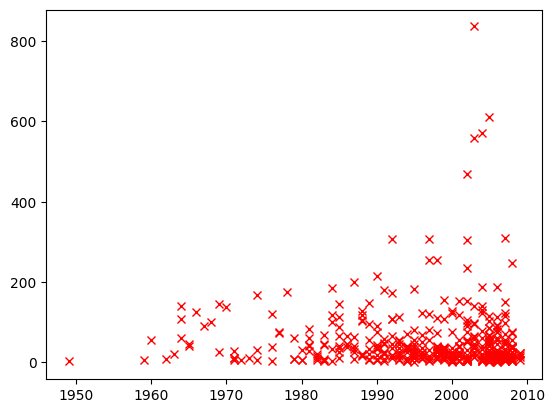

In [8]:
# this ensures the plot appears in the web browser
%matplotlib inline
import pylab as plt # this imports the plotting library in python

plt.plot(film_deaths['Year'], film_deaths['Body_Count'], 'rx')

You may be curious what the arguments we give to plt.plot are for, now is the perfect time to look at the documentation

In [9]:
plt.plot?

We immediately note that some films have a lot of deaths, which prevent us seeing the detail of the main body of films. First lets identify the films with the most deaths.

In [10]:
film_deaths[film_deaths['Body_Count']>200]

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
60,Dip huet gaai tau,1990,214,NaN,Crime|Drama|Thriller,John Woo,Tony Leung Chiu Wai|Jacky Cheung|Waise Lee|Sim...,136,7.7
117,Equilibrium,2002,236,R,Action|Drama|Sci-Fi|Thriller,Kurt Wimmer,Christian Bale|Dominic Purcell|Sean Bean|Chris...,107,7.6
154,Grindhouse,2007,310,R,Action|Horror|Thriller,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,Kurt Russell|Zoë Bell|Rosario Dawson|Vanessa F...,191,7.7
159,Lat sau san taam,1992,307,R,Action|Crime|Drama|Thriller,John Woo,Yun-Fat Chow|Tony Leung Chiu Wai|Teresa Mo|Phi...,128,8.0
193,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,Martin Hancock|Michael Sheen|Nathalie Cox|Eriq...,144,7.2
206,The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,Ken Watanabe|Tom Cruise|William Atherton|Chad ...,154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,Bruce Allpress|Sean Astin|John Bach|Sala Baker...,179,8.8
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,Noel Appleby|Alexandra Astin|Sean Astin|David ...,201,8.9
291,Rambo,2008,247,R,Action|Thriller|War,Sylvester Stallone,Sylvester Stallone|Julie Benz|Matthew Marsden|...,92,7.1
317,Saving Private Ryan,1998,255,R,Action|Drama|War,Steven Spielberg,Tom Hanks|Tom Sizemore|Edward Burns|Barry Pepp...,169,8.6


Here we are using the command `film_deaths['Body_Count']>200` to index the films in the pandas data frame which have over 200 deaths. To sort them in order we can also use the `sort` command. The result of this command on its own is a data series of `True` and `False` values. However, when it is passed to the `film_deaths` data frame it returns a new data frame which contains only those values for which the data series is `True`. We can also sort the result. To sort the result by the values in the `Body_Count` column in *descending* order we use the following command.

In [11]:
film_deaths[film_deaths['Body_Count']>200].sort_values('Body_Count', ascending=False)

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,Noel Appleby|Alexandra Astin|Sean Astin|David ...,201,8.9
193,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,Martin Hancock|Michael Sheen|Nathalie Cox|Eriq...,144,7.2
382,Troy,2004,572,R,Adventure|Drama,Wolfgang Petersen,Julian Glover|Brian Cox|Nathan Jones|Adoni Mar...,163,7.2
206,The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,Ken Watanabe|Tom Cruise|William Atherton|Chad ...,154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,Bruce Allpress|Sean Astin|John Bach|Sala Baker...,179,8.8
154,Grindhouse,2007,310,R,Action|Horror|Thriller,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,Kurt Russell|Zoë Bell|Rosario Dawson|Vanessa F...,191,7.7
159,Lat sau san taam,1992,307,R,Action|Crime|Drama|Thriller,John Woo,Yun-Fat Chow|Tony Leung Chiu Wai|Teresa Mo|Phi...,128,8.0
375,Titanic,1997,307,PG-13,Drama|Romance,James Cameron,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,194,7.7
406,We Were Soldiers,2002,305,R,Action|Drama|History|War,Randall Wallace,Mel Gibson|Madeleine Stowe|Greg Kinnear|Sam El...,138,7.1
349,Starship Troopers,1997,256,R,Action|Sci-Fi,Paul Verhoeven,Casper Van Dien|Dina Meyer|Denise Richards|Jak...,129,7.2


We now see that the 'Lord of the Rings' is a large outlier with a very large number of kills. We can try and determine how much of an outlier by histograming the data.

### Plotting the Data

Text(0.5, 1.0, 'Histogram of Film Kill Count')

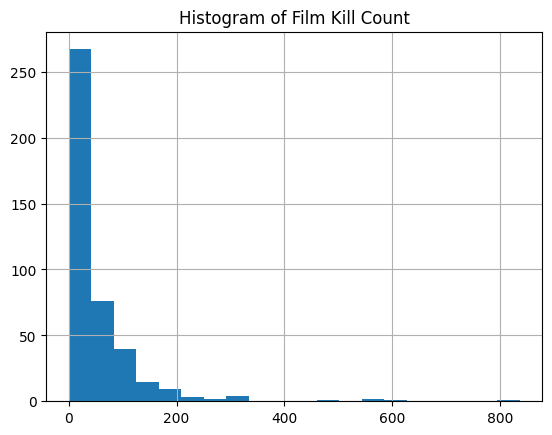

In [12]:
film_deaths['Body_Count'].hist(bins=20) # histogram the data with 20 bins.
plt.title('Histogram of Film Kill Count')

### Question 2
Read on the internet about the following python libraries: `numpy`, `matplotlib`, `scipy` and `pandas`. What functionality does each provide in python. What is the `pylab` library and how does it relate to the other libraries?


*   NumPy: operations on arrays
*   Pandas: data manipulation with DataFrames
*   SciPy: optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems
*   Matplotlib: visualizations.
*   pylab: a module within Matplotlib, provides a convenient, MATLAB-like interactive environment by importing functions and modules from Matplotlib and NumPy into a single namespace.






We could try and remove these outliers, but another approach would be to plot the logarithm of the counts against the year.

Text(0.5, 0, 'year')

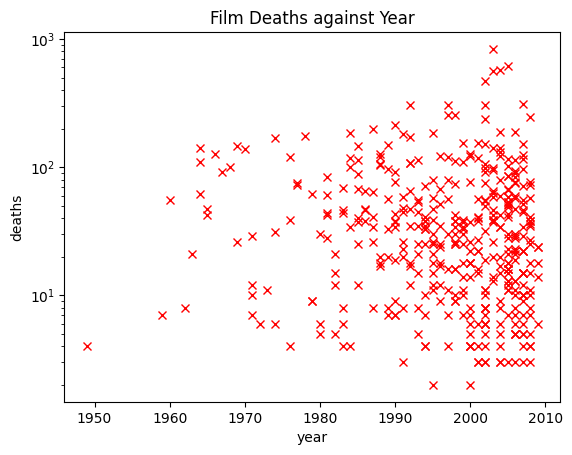

In [13]:
plt.plot(film_deaths['Year'], film_deaths['Body_Count'], 'rx')
ax = plt.gca() # obtain a handle to the current axis
ax.set_yscale('log') # use a logarithmic death scale
# give the plot some titles and labels
plt.title('Film Deaths against Year')
plt.ylabel('deaths')
plt.xlabel('year')

Note a few things. We are interacting with our data. In particular, we are replotting the data according to what we have learned so far. We are using the programming language as a *scripting* language to give the computer one command or another, and then the next command we enter is dependent on the result of the previous. This is a very different paradigm to classical software engineering. In classical software engineering we normally write many lines of code (entire object classes or functions) before compiling the code and running it. Our approach is more similar to the approach we take whilst debugging. Historically, researchers interacted with data using a *console*. A command line window which allowed command entry. The notebook format we are using is slightly different. Each of the code entry boxes acts like a separate console window. We can move up and down the notebook and run each part in a different order. The *state* of the program is always as we left it after running the previous part.  

### Question 3

What is jupyter and why was it invented? Give some examples of functionality it gives over standard python. What is the jupyter project? Name two languages involved in the Jupyter project other than python.

Jupyter is an open-source, interactive computing environment that lets you create and share documents containing live code, visualisations, and narrative text (called notebooks).




# An end-to-end project in ML: using machine learning to predict bike rentals

We will know move on and go in detail through an end-to-end ML project. Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to follow several of the steps in the ML project checklist and use several utilities and models in [scikit-learn](https://scikit-learn.org/stable/) for predicting bike rentals. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#).

### Get the data

In [14]:
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', './SeoulBikeData.csv')

('./SeoulBikeData.csv', <http.client.HTTPMessage at 0x7d1c9e8760c0>)

In [15]:
import pandas as pd
bike_sharing_data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

We can get a description of the data

In [16]:
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


We can see some of the rows in the dataset

In [17]:
bike_sharing_data.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3537,27/04/2018,985,9,13.2,57,0.8,1003,4.8,1.39,0.0,0.0,Spring,No Holiday,Yes
1188,19/01/2018,341,12,4.3,28,1.5,1858,-12.6,0.98,0.0,0.0,Winter,No Holiday,Yes
3638,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
5599,22/07/2018,360,7,25.8,67,0.9,1773,19.1,0.34,0.0,0.0,Summer,No Holiday,Yes
5021,28/06/2018,266,5,22.1,93,0.4,333,20.9,0.00,0.0,0.0,Summer,No Holiday,Yes


The target variable $y$ corresponds to the Rented Bike Count variable of the second column. The following columns correspond to the variables in the feature vector $\mathbf{x}$, *e.g.*, *Hour* is $x_1$ up until *Functioning Day* which is $x_D$. The original dataset also has a date column that we are not going to use in this notebook.

In [18]:
bike_sharing_data = bike_sharing_data.drop('Date', axis=1)

We follow some of the steps in the ML checklist we used in the lecture, including data exploration, data preprocessing, and fine-tuning the ML model. It is important to remember that the testing data that we use for assessing the generalisation performance has to be set aside once we get the data. Also, any data preprocessing that you do has to be done only on the training data and several quantities need to be saved for the test stage. Separating the dataset into training and test before any preprocessing has happened, help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We use scikit-learn to separate the data into training and test sets. Let us first look at how many instances we have in the dataset

In [19]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage:

Several algorithms that we will use assume the inputs to be type 'float' instead of 'int', so we transform those variables in the dataset from int64 to float64.

In [20]:
for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
    bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

In [21]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   float64
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   float64
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(10), object(3)
memory usage: 889.8+ K

The dataset has a few thousand observations. We will use 85% of the data for training and 15% for testing. The `train_test_split` function in scikit-learn allows to easily get these partitions.

In [22]:
from sklearn.model_selection import train_test_split
bs_train_set, bs_test_set = train_test_split(bike_sharing_data, test_size=0.15, random_state=42)

The train and test sets are chosen randomly from all the available data. By specifying a value for `random_state`, we are making sure that every time we run this instruction, the train and test set will have the exact same instances. `random_state` "controls the shuffling applied to the data before applying the split".

### Explore the data

There are different tools we can use to explore the dataset.

#### Histograms

Let us first look at histograms for each of the continuous attributes.

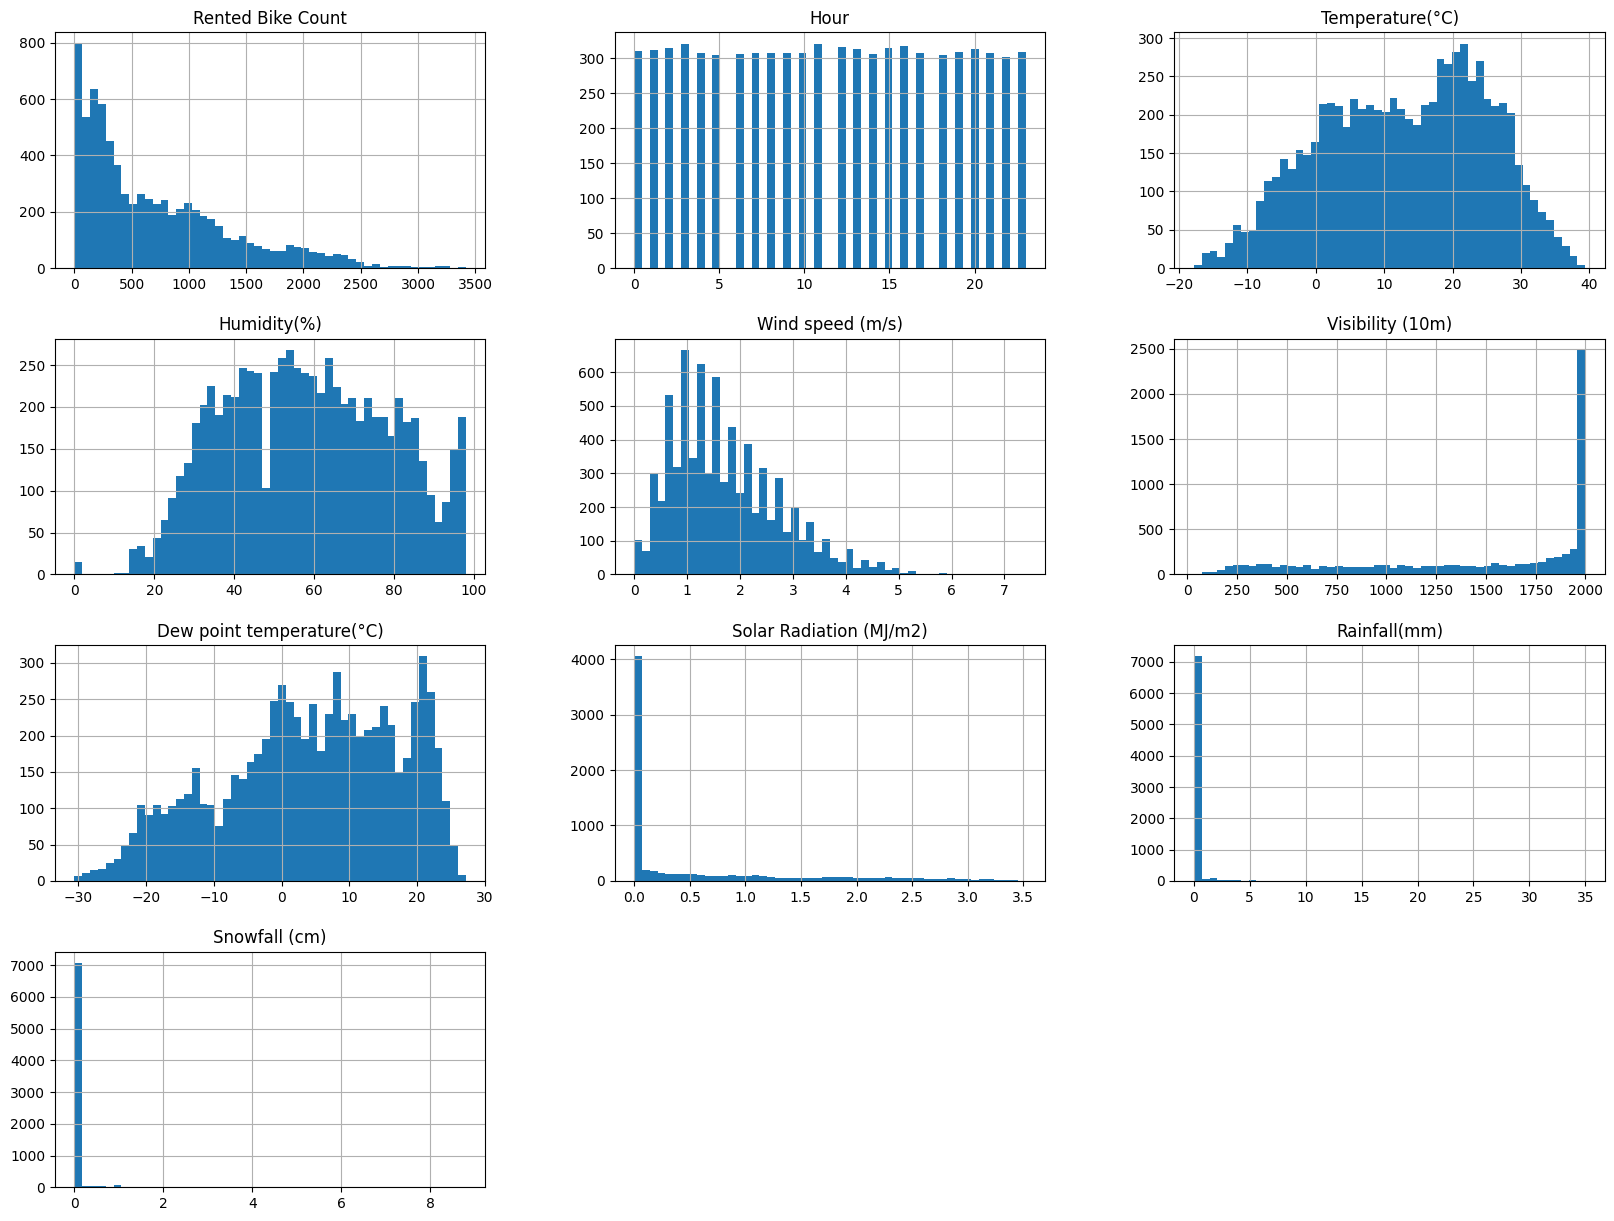

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
bs_train_set.hist(bins=50, figsize=(20,15))
plt.show()

Some observations from the histograms are:

1. The values for the variables Rainfall, Snowfall, Solar Radition and Visibility are concentrated at one of the ends of the plots. This is an indication that several instances might contain outliers. One can consider removing these outliers from the data or binning the data into a few discrete values.

2. Both the Rented Bike Count and the Wind Speed are [skewed to the right](https://en.wikipedia.org/wiki/Skewness), this is, the mean of the distribution is to the right of the median. Some ML algorithms find it harder to detect patterns for this type of distribution. One might consider transforming these features using $\log(x)$ or $\sqrt{x}$ so that they look more like a bell-shaped distribution.

### Question 4

1. Compute the mean and the median for the variables Rented Bike Count and Wind Speed and verify that the mean is to the right of the median.

2. How would the histograms for Rented Bike Count and the Wind Speed look like if we transform the values using $\sqrt{x}$?

3. Would it be possible to use $\log{x}$ instead of $\sqrt{x}$? If not, what would you do to the variable to be able to use it?

In [24]:
print(bs_train_set['Rented Bike Count'].mean())
print(bs_train_set['Rented Bike Count'].median())

print(bs_train_set['Wind speed (m/s)'].mean())
print(bs_train_set['Wind speed (m/s)'].median())

705.8815471394037
507.0
1.7277195809830779
1.5


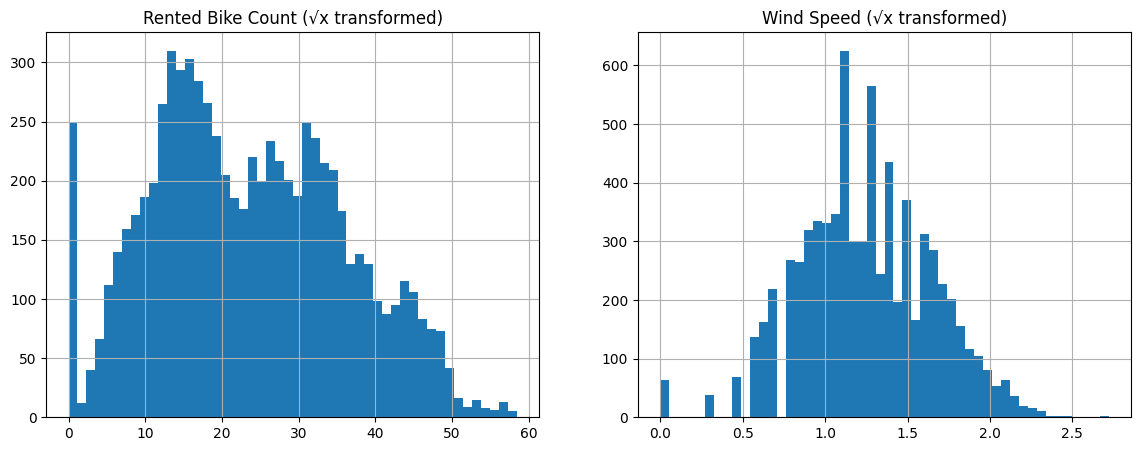

In [25]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

np.sqrt(bs_train_set['Rented Bike Count']).hist(bins=50, ax=axes[0])
axes[0].set_title('Rented Bike Count (√x transformed)')

np.sqrt(bs_train_set['Wind speed (m/s)']).hist(bins=50, ax=axes[1])
axes[1].set_title('Wind Speed (√x transformed)')

plt.show()

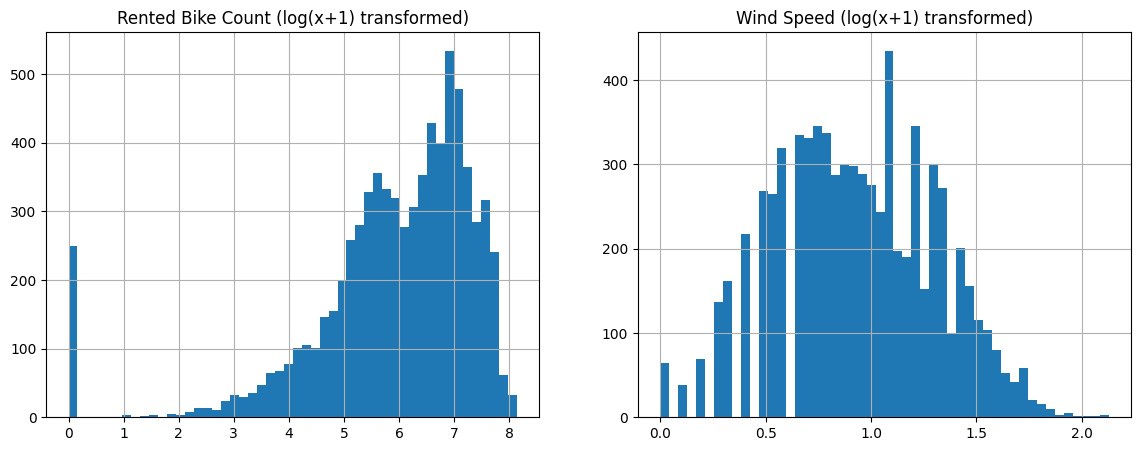

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

np.log1p(bs_train_set['Rented Bike Count']).hist(bins=50, ax=axes[0])
axes[0].set_title('Rented Bike Count (log(x+1) transformed)')
np.log1p(bs_train_set['Wind speed (m/s)']).hist(bins=50, ax=axes[1])
axes[1].set_title('Wind Speed (log(x+1) transformed)')

plt.show()

#### Scatter plots

The Scatter plot is a tool we can use to explore dependencies between the different variables. It contains plots of each variable against each other in the dataset. If there are many variables in the feature vector, including all scatter plots might not be convenient to visualise. Let us look at the scatter plot for the target variable and four of the attributes.

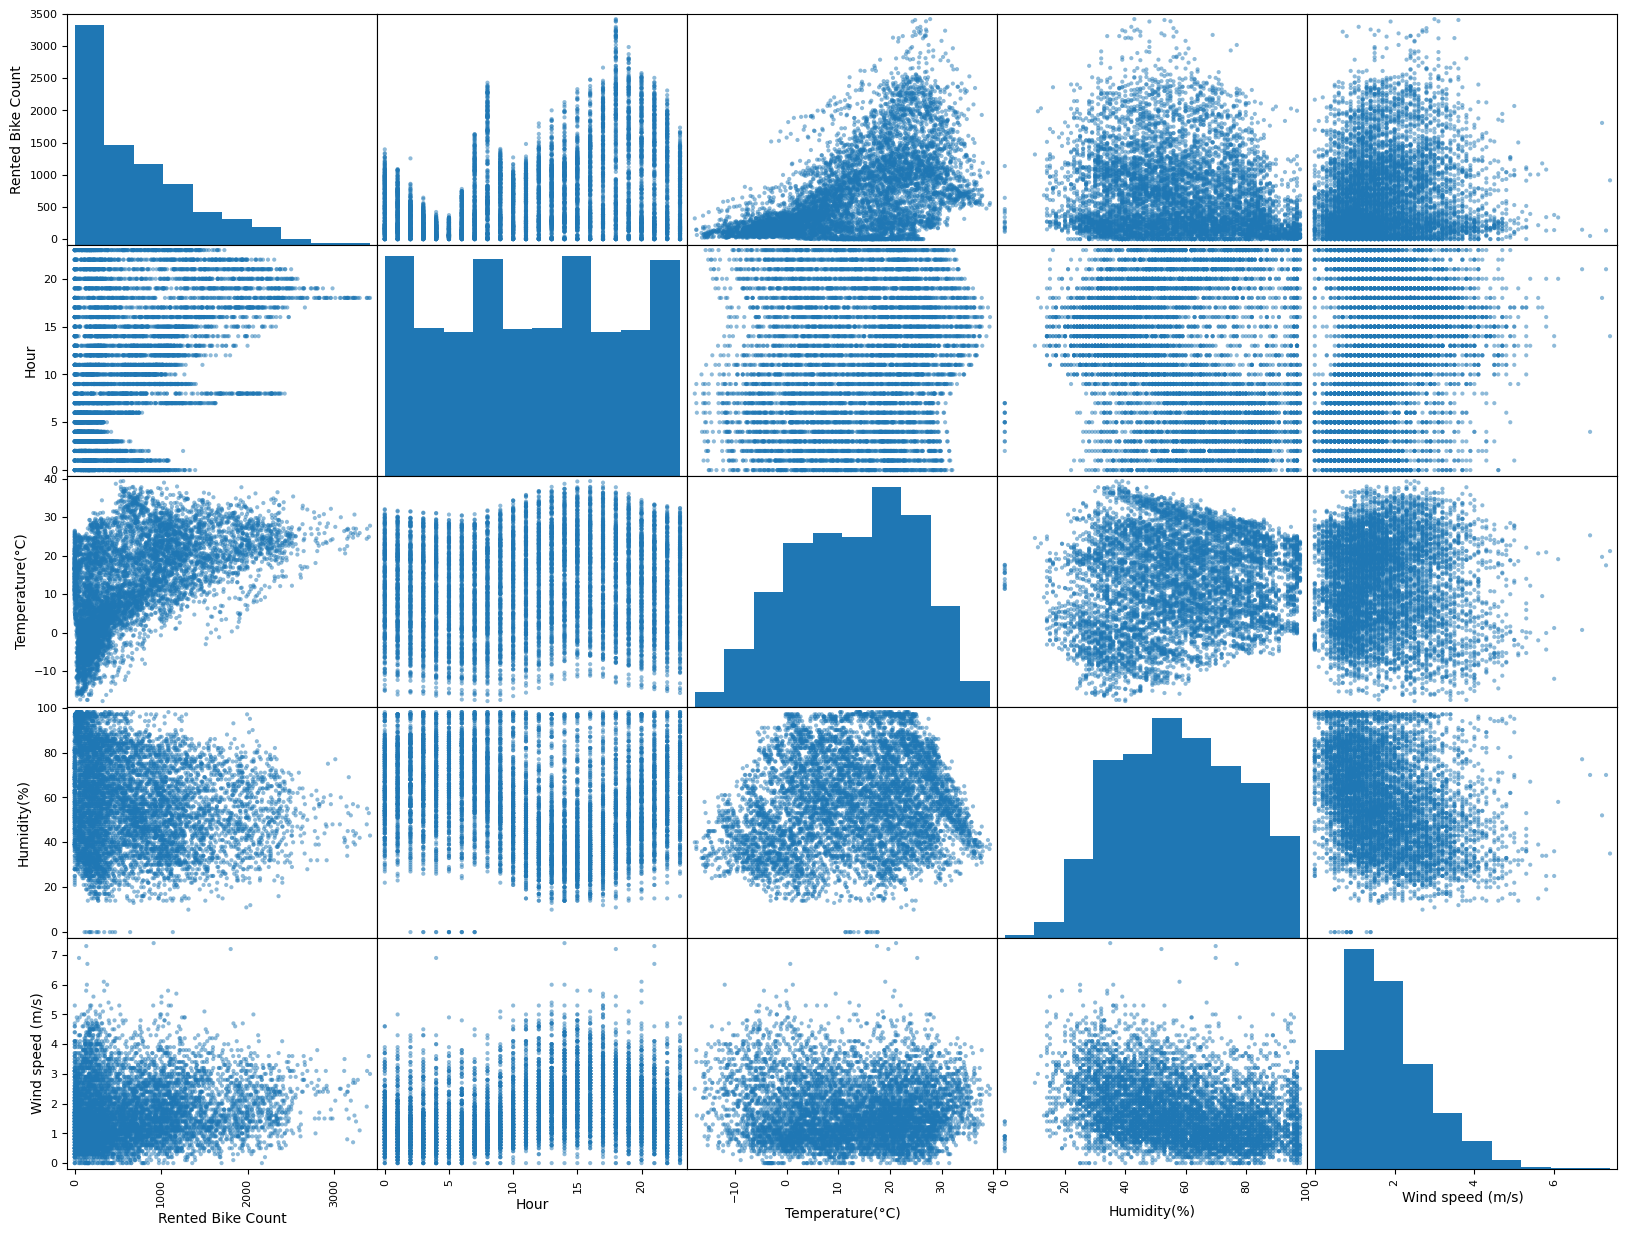

In [27]:
from pandas.plotting import scatter_matrix
attributes = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']
figscat = scatter_matrix(bs_train_set[attributes], figsize=(20, 15))

The variables Hour and Temperature seem well correlatd with Rented Bike Count. The relationship between Humidity and Wind Speed with Rented Bike Count looks less clear though.

### Correlation coefficients

Additionally, we can study the correlation coefficient between the numerical attributes and the Rented Bike Count.

In [28]:
corr_matrix = bs_train_set.corr(numeric_only=True)
corr_matrix['Rented Bike Count'].sort_values(ascending=False)

,Rented Bike Count
Rented Bike Count,1.000000
Temperature(°C),0.537556
Hour,0.417382
Dew point temperature(°C),0.379268
Solar Radiation (MJ/m2),0.256920
Visibility (10m),0.203152
Wind speed (m/s),0.116280
Rainfall(mm),-0.124748
Snowfall (cm),-0.142316
Humidity(%),-0.198830


As we suspected by having looked at the scatter plots, Temperature and Hour are strongly correlated with the target value.

### Question 5

What would the correlation coefficients be if the variables Rented Bike Count and Wind Speed are transformed using $\sqrt{x}$?

In [29]:
# Create sqrt-transformed copies
bs_train_set_sqrt = bs_train_set.copy()
bs_train_set_sqrt['Rented Bike Count'] = np.sqrt(bs_train_set_sqrt['Rented Bike Count'])
bs_train_set_sqrt['Wind speed (m/s)'] = np.sqrt(bs_train_set_sqrt['Wind speed (m/s)'])

# Compute new correlation matrix
corr_matrix_sqrt = bs_train_set_sqrt.corr(numeric_only=True)
corr_matrix_sqrt['Rented Bike Count'].sort_values(ascending=False)

,Rented Bike Count
Rented Bike Count,1.000000
Temperature(°C),0.538991
Hour,0.396535
Dew point temperature(°C),0.370799
Solar Radiation (MJ/m2),0.297958
Visibility (10m),0.207771
Wind speed (m/s),0.129867
Snowfall (cm),-0.155572
Rainfall(mm),-0.166085
Humidity(%),-0.226119


### Prepare the data

We will now prepare the data so that it is suitable for the machine learning models. We consider the following processes for the dataset in this notebook: using one-hot-encoding for the categorical attributes and feature scaling for the numerical attributes. scikit-learn provides utilities for these tasks:

1. [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder) allows to transform a categorical variable to a one-hot encoding representation.

2. [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) performs feature scaling by standardisation.

`OneHotEncoder()` and `StandardScaler()` are part of the scikit-learn [preprocessing module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

### Question 6

Explore the scikit-learn [preprocessing module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). List and explain two of the utilities availaible that you believe are useful for data analysis.

MinMaxScaler: Scales each feature to a given range by subtracting the minimum value and dividing by the range.

LabelEncoder
Converts categorical labels (target values) into integers.

`OneHotEncoder()` and `StandardScaler()` are examples of [data transformations](https://scikit-learn.org/stable/data_transforms.html). In scikit-learn these are referred to as *transformers* and they map the data from one format to another. In a programming context, transformers are classes. They come with the following methods:

- `fit` that is used to learn the  transformation from data.
- `transform` that is used to transform the data once the transformer has been fitted.   
- `fit_transform` that applies first `fit` and then `transform` to the data.

Typically, we use either `fit` or `fit_transform` for the training data and `transform` for the validation or test data.

Since the one-hot-encoding and standardisation transformations will be applied to different columns in the dataset, it is convenient to have a function that applies them both. It is particularly useful since we need to apply those transformations to the train, validation and test sets. We could code such function from scratch, but here, we make use of the [ColumnTransformer()](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=columntransformer#sklearn.compose.ColumnTransformer), an estimator available in scikit-learn that allows to group different transformations into a single method. `ColumnTransformer` is an example of an *estimator* in scikit-learn. An estimator is an object that provides predictions for new data. Besides the `fit`, `transform` and `fit_transform` methods, they most of the times provide the additional `predict` method for making predictions on the test data.

### Question 7

A [pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline) is a very convenient estimator in scikit-learn. Explain what is a pipeline and describe in which situations it is useful.

A Pipeline in scikit-learn is a tool that lets you chain multiple data processing steps and a final estimator into a single object.
Each step is applied in sequence: for example, preprocessing → feature transformation → model fitting.

Let us go back to the dataset and apply the transformations we mentioned before. We first define lists with the names of the attributes, a list for the categorical attributes and a list for the numerical attributes

In [30]:
attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
attributes_num = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

We now import `OneHotEncoder`, `StandardScaler` and `ColumnTransformer` and create the actual transformer

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])
full_transform

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Hour', 'Temperature(°C)', 'Humidity(%)',
                                  'Wind speed (m/s)', 'Visibility (10m)',
                                  'Dew point temperature(°C)',
                                  'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                                  'Snowfall (cm)']),
                                ('cat', OneHotEncoder(),
                                 ['Seasons', 'Holiday', 'Functioning Day'])])

Before applying the full transformation, we separate the target feature from the attributes

In [32]:
bs_train_set_attributes = bs_train_set.drop('Rented Bike Count', axis=1)
bs_train_set_labels = bs_train_set['Rented Bike Count']
bs_train_set_attributes

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5852,20.0,34.5,62.0,2.8,1701.0,26.1,0.02,0.0,0.0,Summer,No Holiday,Yes
7568,8.0,6.0,64.0,1.1,1920.0,-0.3,0.42,0.0,0.0,Autumn,No Holiday,Yes
5970,18.0,32.8,63.0,1.3,1799.0,24.8,0.31,0.0,0.0,Summer,No Holiday,Yes
6791,23.0,21.2,56.0,2.5,2000.0,12.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
576,0.0,-0.6,64.0,2.4,1010.0,-6.5,0.00,0.0,0.0,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22.0,29.9,74.0,2.0,1201.0,24.7,0.00,0.0,0.0,Summer,No Holiday,Yes
5191,7.0,23.5,90.0,0.5,445.0,21.7,0.05,0.5,0.0,Summer,No Holiday,Yes
5390,14.0,29.5,62.0,2.7,1941.0,21.4,1.79,0.0,0.0,Summer,No Holiday,Yes
860,20.0,-3.4,51.0,1.1,1391.0,-12.1,0.00,0.0,0.0,Winter,No Holiday,Yes


We can now apply the fit and apply the full transformation to the training data using `fit_transform`

In [33]:
bs_train_set_attributes_prepared = full_transform.fit_transform(bs_train_set_attributes)

### Short-list models and fine-tune them

Up until this point, we have managed to prepare the data so that it can be used for fitting a predictive model. Scikit-learn includes routines for [several different predictive models for regression and for classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). The application of these methods follows a similar template to the point that applying a method intead of other is just a matter of changing the name of the method.

In this notebook, we will focus on Linear Regression but in a larger ML project, you will be encouraged to try different predictive models, e.g. from those available in scikit-learn, and short-list two to three that look promising.  

We import the [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression) method and fit it to the training data.

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bs_train_set_attributes_prepared, bs_train_set_labels)

LinearRegression()

And that's it! We have fit the ML model. What's next? Well, by now, one may feel tempted to apply the model to the test data to see how it performs. However, one should only do this when being absolutely sure that this is the best performing model on a *validation set*.

We have not used a validation set up until this point because we have not needed to compare between two alternative models. To see how to fine-tune the model, *let us use a validation set to decide whether including the features Rainfall and Snowfall has any benefits*

#### Fine-tuning the model

We take the original train set and split it again into a train set and a validation set. Due to the size of the dataset, we use a simple way for validating the model known as *holdout validation*, for which we hold out a single set of data for validation purposes. When the dataset is smaller, you can perform k-fold cross-validation or if the data is really small, leave-one-out cross validation. Both are implemented in scikit-learn ([k-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) and [leave-one-out cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html?highlight=leave%20one%20out#sklearn.model_selection.LeaveOneOut).)

From the original train set, we used 85% for the train set and 15% for the validation set. We could have split the dataset from the beginning into a train set, a validation set and a test set using 70%, 15% and 15% of the available data, respectively.

In [35]:
bs_train2_set, bs_val_set = train_test_split(bs_train_set, test_size=0.15, random_state=42)
bs_train2_set_attributes = bs_train2_set.drop('Rented Bike Count', axis=1)
bs_train2_set_labels = bs_train2_set['Rented Bike Count']
bs_val_set_attributes = bs_val_set.drop('Rented Bike Count', axis=1)
bs_val_set_labels = bs_val_set['Rented Bike Count']

We will be comparing between two transformations, the one we already described with `full_transform` and one that looks similar except from not including Rainfall and Snowfall.

In [36]:
attributes_num_partial = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
partial_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num_partial),
    ("cat", OneHotEncoder(), attributes_cat),
])

We now use this new transformation to fit_transform the new train set

In [37]:
bs_train2_set_no_RS_attributes = partial_transform.fit_transform(bs_train2_set_attributes)

We now train the linear regression model that only uses the partial transformed attributes

In [38]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(bs_train2_set_no_RS_attributes, bs_train2_set_labels)

LinearRegression()

Let us now assess the performance of this model over the validation data. We first need to prepare the validation input data.

In [39]:
bs_val_set_no_RS_attributes = partial_transform.transform(bs_val_set_attributes)

We now compute the predictions made by the linear model

In [40]:
bs_val_set_predictions_mod = lin_reg_mod.predict(bs_val_set_no_RS_attributes)

We can now compute the RMSE obtained with this predictive model. We can use the [scikit-learn routine for computing the mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) and then compute the square root.

In [41]:
from sklearn.metrics import mean_squared_error
error_mod = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_predictions_mod))
error_mod

np.float64(414.64885759078004)

Let us now look into using all the numerical attributes. The train set has changed, so we need to fit_transform a new full transformer.

In [42]:
bs_train2_set_all_attributes = full_transform.fit_transform(bs_train2_set_attributes)

We creat the new linear regression model

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(bs_train2_set_all_attributes, bs_train2_set_labels)

LinearRegression()

Transform the validation data

In [44]:
bs_val_set_all_attributes = full_transform.transform(bs_val_set_attributes)

We finally perform the prediction

In [45]:
bs_val_set_predictions = lin_reg.predict(bs_val_set_all_attributes)
error = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_predictions))
error

np.float64(412.7141451928566)

We conclude from this that the variables Rainfall and Snowfall actually help to slightly improve the predictions.

### Question 8

Perhaps other transformations to the dataset can help to improve the predictions. Try the following transformations and see whether the RMSE over the validation set reduces even more:

1. Before standardising the feature Wind speed, first transform it using $\sqrt{x}$.
2. Transform the Rainfall and the Snowfall to discrete features using the scikit-learn utility [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) with $K=5$.
3. Instead of doing standardisation over the other numerical features, use normalisation.
4. Keep the one-hot-encoding for the categorical features.

In [55]:
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.pipeline import Pipeline


# Define column groups
cat_cols = ['Seasons', 'Holiday', 'Functioning Day']

num_cols = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
    'Visibility (10m)', 'Dew point temperature(°C)',
    'Solar Radiation (MJ/m2)'
]

wind_col  = ['Wind speed (m/s)']
rain_snow = ['Rainfall(mm)', 'Snowfall (cm)']

# Build the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # 1. √x on Wind speed, then MinMaxScaler (normalisation)
        ('wind', Pipeline([
            ('sqrt', FunctionTransformer(np.sqrt, feature_names_out='one-to-one')),
            ('scale', MinMaxScaler())
        ]), wind_col),

        # 2. KBinsDiscretizer (K=5) for Rainfall & Snowfall
        ('rain_snow', KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile'), rain_snow),

        # 3. Normalisation (MinMaxScaler) for other numeric features
        ('num_rest', MinMaxScaler(), num_cols),

        # 4. One-hot encoding for categoricals
        ('cat', OneHotEncoder(), cat_cols),
    ]
)

bs_train3_set, bs_val_set = train_test_split(bs_train_set, test_size=0.15, random_state=42)
bs_train3_set_attributes = bs_train3_set.drop('Rented Bike Count', axis=1)
bs_train3_set_labels = bs_train3_set['Rented Bike Count']
bs_val_set_attributes = bs_val_set.drop('Rented Bike Count', axis=1)
bs_val_set_labels = bs_val_set['Rented Bike Count']


bs_train3_set_all_attributes = preprocessor.fit_transform(bs_train2_set_attributes)

lin_reg = LinearRegression()
lin_reg.fit(bs_train3_set_all_attributes, bs_train3_set_labels)

bs_val_set_all_attributes = preprocessor.transform(bs_val_set_attributes)

bs_val_set_predictions = lin_reg.predict(bs_val_set_all_attributes)
error = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_predictions))
error

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


np.float64(414.5574219068666)

Between chosing to include Rainfall and Snowfall or not, the stage of validation tells us we should include them. If this was the only hyperparameter to choose from, we would be done and we could proceed to compute the generalisation error on the test set. Since we are not considering more fine-tuning at the moment, let us compute the RMSE over the test set. We have already prepared the whole training data (what we called train2+val) before using the full transform, we called it `bs_train_set_attributes_prepared`

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(bs_train_set_attributes_prepared, bs_train_set_labels)

LinearRegression()

Let us transform the test data so that we can apply the fitted model correctly

In [48]:
bs_test_set_attributes = bs_test_set.drop('Rented Bike Count', axis=1)
bs_test_set_labels = bs_test_set['Rented Bike Count']

We now transform the attributes in the test set

In [49]:
bs_test_set_attributes_prepared = full_transform.transform(bs_test_set_attributes)

We perform the prediction

In [50]:
bs_test_set_predictions = lin_reg.predict(bs_test_set_attributes_prepared)

And compute the RMSE

In [51]:
error_test = np.sqrt(mean_squared_error(bs_test_set_labels, bs_test_set_predictions))
error_test

np.float64(432.9696397444715)

The performance in the test set is slightly worse when compared to the performance in the validation set.